<a href="https://colab.research.google.com/github/venkat2ram/Keras-and-Tensorflow/blob/master/ud_L0602_TransferLearning_practice_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import tensorflow.keras.utils
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds
import tensorflow_hub as hub

In [39]:
URL='https://www.tensorflow.org/datasets/catalog/tf_flowers'
(training_examples,validation_examples),info=tfds.load('tf_flowers',split=['train[:80%]','train[80%:]'],as_supervised=True,with_info=True)

In [40]:
num_examples=info.splits['train'].num_examples

In [41]:
num_classes=info.features['label'].num_classes

In [42]:
num_examples, num_classes

(3670, 5)

In [43]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
})

In [44]:
IMAGE_RES=224
BATCH_SIZE=32

In [45]:
def format_image(image,label):
  image=tf.image.resize(image,size=(IMAGE_RES,IMAGE_RES))/255.0
  return image,label

train_batches=training_examples.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
val_batches=validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [73]:
#model_url='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

model_url='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

feature_extractor=hub.KerasLayer(model_url,input_shape=(IMAGE_RES,IMAGE_RES,3))

In [74]:
feature_extractor.trainable=False

In [75]:
model=tf.keras.Sequential([feature_extractor,layers.Dense(5)])

In [76]:
model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [82]:
epochs=10

In [78]:
history=model.fit(train_batches,epochs=epochs,batch_size=BATCH_SIZE,validation_data=val_batches)

Epoch 1/10
92/92 [==============================] - 7s 74ms/step - loss: 0.7027 - accuracy: 0.7459 - val_loss: 0.4000 - val_accuracy: 0.8692
Epoch 2/10
92/92 [==============================] - 6s 70ms/step - loss: 0.3624 - accuracy: 0.8835 - val_loss: 0.3174 - val_accuracy: 0.8992
Epoch 3/10
92/92 [==============================] - 7s 71ms/step - loss: 0.2904 - accuracy: 0.9046 - val_loss: 0.2983 - val_accuracy: 0.9046
Epoch 4/10
92/92 [==============================] - 7s 71ms/step - loss: 0.2414 - accuracy: 0.9237 - val_loss: 0.2711 - val_accuracy: 0.9128
Epoch 5/10
92/92 [==============================] - 7s 71ms/step - loss: 0.2142 - accuracy: 0.9366 - val_loss: 0.2569 - val_accuracy: 0.9114
Epoch 6/10
92/92 [==============================] - 7s 71ms/step - loss: 0.1819 - accuracy: 0.9479 - val_loss: 0.2487 - val_accuracy: 0.9183
Epoch 7/10
92/92 [==============================] - 7s 71ms/step - loss: 0.1600 - accuracy: 0.9584 - val_loss: 0.2607 - val_accuracy: 0.9128
Epoch 8/10
92

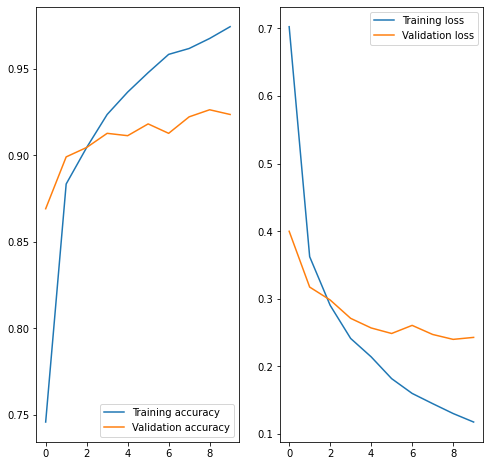

In [85]:
accuray=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epoch_range=range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range,accuray,label='Training accuracy')
plt.plot(epoch_range,val_accuracy,label='Validation accuracy')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(epoch_range,loss,label='Training loss')
plt.plot(epoch_range,val_loss,label='Validation loss')
plt.legend(loc='upper right')

In [109]:
image_batch,image_label=next(iter(train_batches))

image_batch=image_batch.numpy()
image_label=image_label.numpy()

predicted_labels=model.predict(image_batch)
predicted_labels=np.argmax(predicted_labels,axis=-1)



In [110]:
class_names=np.array(info.features['label'].names)
predicted_label_names=class_names[predicted_labels]

In [111]:
predicted_label_names

array(['roses', 'daisy', 'daisy', 'dandelion', 'daisy', 'tulips', 'daisy',
       'roses', 'daisy', 'dandelion', 'tulips', 'daisy', 'dandelion',
       'tulips', 'roses', 'daisy', 'tulips', 'tulips', 'roses', 'roses',
       'roses', 'tulips', 'daisy', 'dandelion', 'dandelion', 'dandelion',
       'dandelion', 'dandelion', 'tulips', 'tulips', 'sunflowers',
       'roses'], dtype='<U10')

In [117]:
class_names[image_label]

array(['roses', 'daisy', 'daisy', 'dandelion', 'daisy', 'tulips',
       'tulips', 'roses', 'daisy', 'dandelion', 'tulips', 'daisy',
       'dandelion', 'tulips', 'roses', 'tulips', 'tulips', 'tulips',
       'roses', 'roses', 'roses', 'tulips', 'daisy', 'dandelion',
       'dandelion', 'dandelion', 'dandelion', 'dandelion', 'tulips',
       'tulips', 'sunflowers', 'roses'], dtype='<U10')

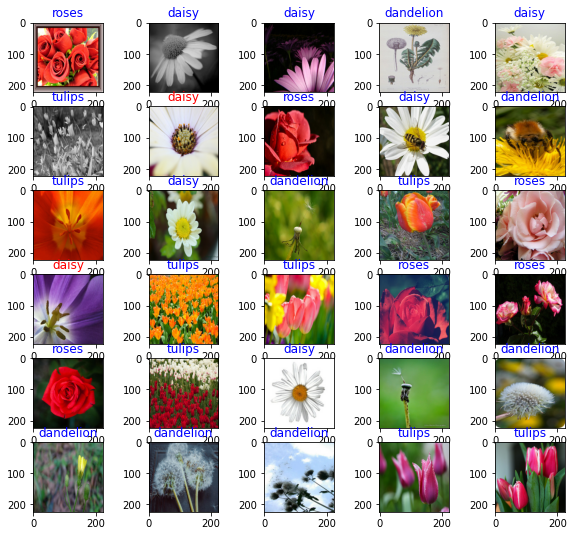

In [113]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_labels[n]==image_label[n] else "red"
  plt.title(predicted_label_names[n],color=color)
  

In [115]:
class_names

array(['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'],
      dtype='<U10')

In [96]:
np.array(info.features['label'].names)

array(['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses'],
      dtype='<U10')